# Data Wrangling 
### in this project i used three sources for analayzing :-

- twitter_archive_enhanced.csv i saved manually 
- downloading file Programmatically using 'requests'library
- using API of twitter.

In [1]:
import pandas as pd
import numpy as np
import tweepy 
import requests
import json
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer

# 1.Gathering Data

### 1.Saved twitter_archive_enhanced.csv manually then read it .

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.Using 'requests' library to download image_predictions.tsv file Programmatically, then read it .

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.Using api keys from twitter 

In [7]:

consumer_key = 'none'
consumer_secret = 'none'
access_token = 'noe'
access_secret = 'none'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


'\nconsumer_key = \'none\'\nconsumer_secret = \'none\'\naccess_token = \'noe\'\naccess_secret = \'none\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n        

In [8]:
tweets_all_df = pd.read_json('tweet-json.txt', lines=True)
tweets_all_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# 2.Assessing Data

### First DataFrame (twitter_archive)

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## Quality Assess(twitter_archive)

- 1.There is a many vlues in rating_numerator more than 10 to 13 we need to remove it .
- 2.There is a many vlues in rating_denominator not equal 10  we need to remove it .
- 3.i will make rating_numerator is the basic rating , because i make all the rating_denominator equal 10 . then i will delete rating_denominator column.
- 4.only want original dog ratings,I need to remove all rows that have values in (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)
- 5.There is some columns that i dont need it im my analyzing and have many nulls (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp)
- 6.Change tweet_id format to string.
- 7.Change names of some columns like timestamp to tweet_time and and name to dog_name 
- 8.In timestamp column , we have to remove '+0000' from the date.
- 9.Change timestamp format to datatime.
- 10.When we ceate dog_stage column , we found a lot of 'none' , we have to make it NULL by numpy.
- 11.only want original dog ratings,I need to remove all rows that have values in (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

## Tideness Assess

- 1.Collect the three datasets together
- 2.The dog stage has 4 stages, should be in single column called 'dog_stage'

### Second DataFrame (image_predictions)

In [15]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Quality Assess(image_predictions)

- 1.Change tweet_id format from integer to string 
- 2.Remove some unnecessary columns like jpg_url because its already found it in twitter_archive datafeame , and img_num column because i dont need it in my analyzing.
- 3.chnage some coulmns name like (p1,p2,p3) to (prediction1,prediction2,prediction3)

## Tideness Assess(image_predictions)

- none

### Third DataFrame (tweets_all_df)

In [18]:
tweets_all_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
tweets_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
tweets_all_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Quality Assess(tweets_all_df)

- 1.Create a new dataframe i will named (tweets_df) to chose the required columns that I need.
- 2.Change id format to string.
- 3.Change id coulmn name to tweet_id to to merge tables later softly.

## Tideness Assess(tweets_all_df)

- none


# Cleaning Data 

In [20]:
# we need to make copies for three data frams first
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_all_df_clean = tweets_all_df.copy()

## Quality Assess

- Define 1 : i will start with tweets_all_df to chose that coulmns that i need and then i will rename id coulmn to tweet_id for merge

In [21]:
#CODE
#I chose the required columns that need, and changed the name of column 'id' to 'tweet_id '  to merge tables later softly
tweets_df = tweets_all_df_clean[['id', 'favorite_count','retweet_count']]
tweets_df = tweets_df.rename(columns={'id':'tweet_id'})

In [22]:
#TEST
tweets_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Tideness Assess

- define 1 : merge three dataframes and i will use inner join

In [23]:
#CODE
# merge 'twitter_archive_clean' and 'img_predictions_clean'
master_df_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                                   how = 'inner', on = 'tweet_id')
# merge 'master_df_clean' and 'tweets_df'
master_df_clean = pd.merge(master_df_clean, tweets_df,
                                   how = 'inner', on = 'tweet_id')

In [24]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

- define 2 :the dog stage has 4 stages, should be in single column

In [25]:
#CODE : i will create dog_stage column by extracting from (puppo|pupper|floofer|doggo) columns , after extracting
# i will drop that columns 

# Extracting the dog stage variables from the text column when available 
master_df_clean['dog_stage'] = master_df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
master_df_clean = master_df_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [26]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  jpg_url                     2073 

## Quality Assess

- define 1:There is a many vlues in rating_denominator not equal 10  we need to remove it .

In [27]:
#CODE
#Drop rows where denominator of rating != 10
master_df_clean.drop(master_df_clean[master_df_clean.rating_denominator != 10].index, inplace = True)

In [28]:
#TESE
master_df_clean['rating_denominator'].value_counts()

10    2055
Name: rating_denominator, dtype: int64

- define 2:There is a many vlues in rating_numerator more than 10 to 13 we need to remove it .


In [29]:
#CODE
#Drop rows where numerator rating >13
master_df_clean.drop(master_df_clean[master_df_clean.rating_numerator > 13].index, inplace = True)

In [30]:
#TEST
master_df_clean['rating_numerator'].value_counts()

12    473
10    429
11    413
13    283
9     150
8      95
7      51
5      34
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

- define 3: i will make rating_numerator is the basic rating , because i make all the rating_denominator equal 10 . then i will delete rating_denominator column.

In [31]:
#code 
# change rating_numerator name to basic_rating 
master_df_clean.rename(index=str, columns={"rating_numerator": "basic_rating"}, inplace=True)

In [32]:
#code
#drop rating_denominator column 
master_df_clean = master_df_clean.drop(columns=['rating_denominator'])

In [33]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2009 non-null   int64  
 1   in_reply_to_status_id       20 non-null     float64
 2   in_reply_to_user_id         20 non-null     float64
 3   timestamp                   2009 non-null   object 
 4   source                      2009 non-null   object 
 5   text                        2009 non-null   object 
 6   retweeted_status_id         73 non-null     float64
 7   retweeted_status_user_id    73 non-null     float64
 8   retweeted_status_timestamp  73 non-null     object 
 9   expanded_urls               2009 non-null   object 
 10  basic_rating                2009 non-null   int64  
 11  name                        2009 non-null   object 
 12  jpg_url                     2009 non-null   object 
 13  img_num                     2009 non-n

- define 4.only want original dog ratings,I need to remove all rows that have values in (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

In [34]:
#CODE
# we chose just NULLs values in this columns (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)
master_df_clean = master_df_clean[master_df_clean.retweeted_status_id.isnull()]
master_df_clean = master_df_clean[master_df_clean.retweeted_status_user_id.isnull()]
master_df_clean = master_df_clean[master_df_clean.retweeted_status_timestamp.isnull()]

In [35]:
#test
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1936 non-null   int64  
 1   in_reply_to_status_id       20 non-null     float64
 2   in_reply_to_user_id         20 non-null     float64
 3   timestamp                   1936 non-null   object 
 4   source                      1936 non-null   object 
 5   text                        1936 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1936 non-null   object 
 10  basic_rating                1936 non-null   int64  
 11  name                        1936 non-null   object 
 12  jpg_url                     1936 non-null   object 
 13  img_num                     1936 non-n

- define 5:There is some columns that i dont need it im my analyzing and have many nulls (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp,etc)

In [36]:
#CODE
#Drop unnecessary columns
master_df_clean = master_df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','img_num','expanded_urls','jpg_url','text','source'])

In [37]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1936 non-null   int64  
 1   timestamp       1936 non-null   object 
 2   basic_rating    1936 non-null   int64  
 3   name            1936 non-null   object 
 4   p1              1936 non-null   object 
 5   p1_conf         1936 non-null   float64
 6   p1_dog          1936 non-null   bool   
 7   p2              1936 non-null   object 
 8   p2_conf         1936 non-null   float64
 9   p2_dog          1936 non-null   bool   
 10  p3              1936 non-null   object 
 11  p3_conf         1936 non-null   float64
 12  p3_dog          1936 non-null   bool   
 13  favorite_count  1936 non-null   int64  
 14  retweet_count   1936 non-null   int64  
 15  dog_stage       304 non-null    object 
dtypes: bool(3), float64(3), int64(4), object(6)
memory usage: 217.4+ KB


- define 6:Change tweet_id format to string.

In [38]:
#CODE
# using astype function
master_df_clean['tweet_id'] = master_df_clean['tweet_id'].astype('str')

In [39]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1936 non-null   object 
 1   timestamp       1936 non-null   object 
 2   basic_rating    1936 non-null   int64  
 3   name            1936 non-null   object 
 4   p1              1936 non-null   object 
 5   p1_conf         1936 non-null   float64
 6   p1_dog          1936 non-null   bool   
 7   p2              1936 non-null   object 
 8   p2_conf         1936 non-null   float64
 9   p2_dog          1936 non-null   bool   
 10  p3              1936 non-null   object 
 11  p3_conf         1936 non-null   float64
 12  p3_dog          1936 non-null   bool   
 13  favorite_count  1936 non-null   int64  
 14  retweet_count   1936 non-null   int64  
 15  dog_stage       304 non-null    object 
dtypes: bool(3), float64(3), int64(3), object(7)
memory usage: 217.4+ KB


- define 7: rename some of colmuns names

In [40]:
#CODE
# using rename function 
master_df_clean.rename(columns={'timestamp':'tweet_time','name':'dog_name','p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)

In [41]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1936 non-null   object 
 1   tweet_time      1936 non-null   object 
 2   basic_rating    1936 non-null   int64  
 3   dog_name        1936 non-null   object 
 4   Prediction1     1936 non-null   object 
 5   p1_conf         1936 non-null   float64
 6   p1_dog          1936 non-null   bool   
 7   Prediction2     1936 non-null   object 
 8   p2_conf         1936 non-null   float64
 9   p2_dog          1936 non-null   bool   
 10  Prediction3     1936 non-null   object 
 11  p3_conf         1936 non-null   float64
 12  p3_dog          1936 non-null   bool   
 13  favorite_count  1936 non-null   int64  
 14  retweet_count   1936 non-null   int64  
 15  dog_stage       304 non-null    object 
dtypes: bool(3), float64(3), int64(3), object(7)
memory usage: 217.4+ KB


- define 8:In timestamp column , we have to remove '+0000' from the date.

In [42]:
#CODE
#using strip we will cut '+0000' from date
master_df_clean['tweet_time']= master_df_clean['tweet_time'].str.strip('+0000')

In [43]:
#TEST
master_df_clean['tweet_time']

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2068    2015-11-16 00:24:50 
2069    2015-11-16 00:04:52 
2070    2015-11-15 23:21:54 
2071    2015-11-15 23:05:30 
2072    2015-11-15 22:32:08 
Name: tweet_time, Length: 1936, dtype: object

- define 9:Change timestamp format to datatime.

In [44]:
#CODE
#
master_df_clean['tweet_time'] = pd.to_datetime(master_df_clean['tweet_time'])

In [45]:
#TEST
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1936 non-null   object        
 1   tweet_time      1936 non-null   datetime64[ns]
 2   basic_rating    1936 non-null   int64         
 3   dog_name        1936 non-null   object        
 4   Prediction1     1936 non-null   object        
 5   p1_conf         1936 non-null   float64       
 6   p1_dog          1936 non-null   bool          
 7   Prediction2     1936 non-null   object        
 8   p2_conf         1936 non-null   float64       
 9   p2_dog          1936 non-null   bool          
 10  Prediction3     1936 non-null   object        
 11  p3_conf         1936 non-null   float64       
 12  p3_dog          1936 non-null   bool          
 13  favorite_count  1936 non-null   int64         
 14  retweet_count   1936 non-null   int64         
 15  dog_stage

- define 10:When we ceate dog_stage column , we found a lot of 'none' , we have to make it NULL by numpy.

In [46]:
#CODE
#using numpy we will change the none value to nulls in dog_stage coulmn
master_df_clean['dog_stage'].replace('None', np.nan, inplace=True)

In [47]:
#TEST
master_df_clean.query('dog_stage == "none"').value_counts()

Series([], dtype: int64)

# Storing 

In [48]:
#Store the data
master_df_clean.to_csv('twitter_master.csv',index=False)

# My anlayzing insights with Visualizing .

In [50]:
master_df_clean['favorite_count'].max()

132810

In [51]:
master_df_clean.query('favorite_count == 132810')

,tweet_id,tweet_time,basic_rating,dog_name,Prediction1,p1_conf,p1_dog,Prediction2,p2_conf,p2_dog,Prediction3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
329,822872901745569793,2017-01-21 18:26:02,13,None,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810,48265,puppo


- ### insight 1: The famous and popular dog in the dataset with more 132000 likes , is Lakeland terrier Type

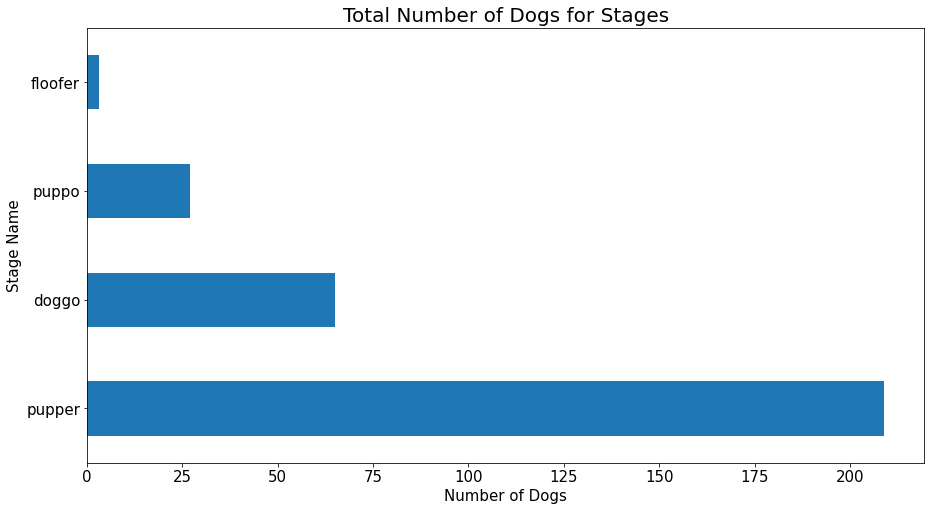

In [52]:
plt.figure(figsize=(15,8))
plt.title("Total Number of Dogs for Stages", size=20)
plt.ylabel("Stage Name", size=15)
plt.xlabel("Number of Dogs", size=15)
master_df_clean.dog_stage.value_counts().plot(kind='barh', fontsize=15);

- ### insight 2:The most common dogs is (pupper) by more than 200 dogs 

In [53]:
master_df_clean.basic_rating.value_counts()

12    450
10    419
11    396
13    261
9     150
8      95
7      51
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: basic_rating, dtype: int64

- ### insight 3:most pepole give a rate 12/10 for dogs then 10/10